In [1]:
import  pandas as pd
import re
from datetime import datetime
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data/cleaned_dataset/experiment_data/timestamp_updated.xlsx")
df

,Column1,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,4504,charge,2008-04-02 13:08:17,24,B0006,0,4505,04505.csv,NaN,NaN,NaN
1,5122,charge,2008-04-02 13:08:17,24,B0005,0,5121,05121.csv,NaN,NaN,NaN
2,5736,charge,2008-04-02 13:08:17,24,B0007,0,5737,05737.csv,NaN,NaN,NaN
3,5123,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487421,NaN,NaN
4,5737,discharge,2008-04-02 15:25:41,24,B0007,1,5738,05738.csv,1.891052295,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7560,7059,charge,2010-09-30 12:31:10,4,B0054,251,7060,07060.csv,NaN,NaN,NaN
7561,7312,charge,2010-09-30 12:31:10,4,B0056,251,7313,07313.csv,NaN,NaN,NaN
7562,7564,charge,2010-09-30 12:31:10,4,B0055,251,7565,07565.csv,NaN,NaN,NaN
7563,6807,discharge,2010-09-30 15:32:33,4,B0053,136,6808,06808.csv,0,NaN,NaN


In [3]:
discharge_df = df.loc[df['type']=='discharge']

In [7]:
#cycle_id
discharge_df['cycle_id'] = (discharge_df['start_time'] != discharge_df['start_time'].shift()).cumsum()


C:\Users\santh\AppData\Local\Temp\ipykernel_20408\3096984081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharge_df['cycle_id'] = (discharge_df['start_time'] != discharge_df['start_time'].shift()).cumsum()


In [8]:
discharge_df = df.loc[df['type']=='discharge']

In [9]:
discharge_df = discharge_df[['type', 'start_time', 'ambient_temperature', 'battery_id',
       'test_id', 'uid', 'filename', 'Capacity']]
discharge_df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity
3,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487421
4,discharge,2008-04-02 15:25:41,24,B0007,1,5738,05738.csv,1.891052295
5,discharge,2008-04-02 15:25:41,24,B0006,1,4506,04506.csv,2.035337591
9,discharge,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.84632725
10,discharge,2008-04-02 19:43:48,24,B0007,3,5740,05740.csv,1.880637028
...,...,...,...,...,...,...,...,...
7556,discharge,2010-09-30 11:50:17,4,B0055,250,7564,07564.csv,0.990759166
7557,discharge,2010-09-30 11:50:17,4,B0053,134,6806,06806.csv,1.010274008
7558,discharge,2010-09-30 11:50:17,4,B0056,250,7312,07312.csv,1.129059014
7563,discharge,2010-09-30 15:32:33,4,B0053,136,6808,06808.csv,0


In [10]:
exp_filename = discharge_df['filename'].values 
selected_columns = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load']



for  i in exp_filename:
    index = discharge_df[discharge_df['filename'] == i].index
    # print(index)
    temp_df = pd.read_csv("data/NASA Battery Experiment data/data/" + i)
    valid_columns = [col for col in selected_columns if col in temp_df.columns]

    if not valid_columns:
        print(f"Columns {selected_columns} do not exist in {i}. Skipping...")
        continue

    # Calculate mean for selected columns in temp_df
    
    temp_mean_values = temp_df[valid_columns].mean()
    temp_median_values = temp_df[valid_columns].median()
    temp_std_values = temp_df[valid_columns].std()
    discharge_df.loc[index,"BL"] = temp_df['Time'].iloc[-1] -temp_df['Time'].iloc[0]
    # Add mean values as new columns to charge_discharge_df
    for stat in ["mean", "median", "std"]:
    # Iterate over columns and their corresponding values
        for col, stat_val in zip(valid_columns, [temp_mean_values, temp_median_values, temp_std_values][["mean", "median", "std"].index(stat)]):
            new_col_name = f"{col}_{stat}"
            # print(new_col_name)
            # print(index,new_col_name,stat_val)
            discharge_df.loc[index, new_col_name] = stat_val
    
    

# Display the updated DataFrame
display(discharge_df)


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,BL,Voltage_measured_mean,...,Voltage_measured_median,Current_measured_median,Temperature_measured_median,Current_load_median,Voltage_load_median,Voltage_measured_std,Current_measured_std,Temperature_measured_std,Current_load_std,Voltage_load_std
3,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487421,3690.234,3.529829,...,3.529903,-2.012427,32.865786,-1.9982,2.6100,0.236558,0.595058,3.495804,0.591217,0.796974
4,discharge,2008-04-02 15:25:41,24,B0007,1,5738,05738.csv,1.891052295,3690.234,3.522007,...,3.539632,-1.990024,32.747709,-2.0000,2.6030,0.288178,0.476508,3.892063,0.479455,0.659538
5,discharge,2008-04-02 15:25:41,24,B0006,1,4506,04506.csv,2.035337591,3690.234,3.556946,...,3.548989,-2.010775,32.352429,-1.9992,2.6510,0.226595,0.202011,3.460482,0.200853,0.304399
9,discharge,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.84632725,3672.344,3.537320,...,3.535737,-2.012368,32.968785,-1.9982,2.6045,0.235366,0.596704,3.435509,0.592561,0.796596
10,discharge,2008-04-02 19:43:48,24,B0007,3,5740,05740.csv,1.880637028,3672.344,3.531949,...,3.545337,-1.989573,32.865281,-2.0000,2.6105,0.280425,0.477820,3.777426,0.480583,0.659843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,discharge,2010-09-30 11:50:17,4,B0055,250,7564,07564.csv,0.990759166,2357.687,3.341122,...,3.408440,-1.987498,10.931401,1.9990,2.2180,0.363112,0.715513,3.175032,0.719854,0.850250
7557,discharge,2010-09-30 11:50:17,4,B0053,134,6806,06806.csv,1.010274008,NaN,3.064491,...,3.189265,-2.012392,12.065192,1.9976,2.2040,0.422919,0.209126,4.101648,0.207652,0.457409
7558,discharge,2010-09-30 11:50:17,4,B0056,250,7312,07312.csv,1.129059014,2357.687,3.349642,...,3.377889,-1.993270,10.439799,1.9982,2.2375,0.291255,0.684880,2.170885,0.686409,0.808908
7563,discharge,2010-09-30 15:32:33,4,B0053,136,6808,06808.csv,0,23.000,4.060790,...,4.190425,-0.002086,6.072575,0.0006,2.8060,0.224683,1.160515,0.380250,1.153026,2.141809


In [11]:
discharge_df.to_excel('data/cleaned_dataset/experiment_data/discharge_df_v5.xlsx')

In [13]:
 #removing unwanted columns
discharge_df = pd.read_excel('data/cleaned_dataset/experiment_data/discharge_df_v5.xlsx')
discharge_df.columns

Index(['Unnamed: 0', 'type', 'start_time', 'ambient_temperature', 'battery_id',
       'test_id', 'uid', 'filename', 'Capacity', 'BL', 'Voltage_measured_mean',
       'Current_measured_mean', 'Temperature_measured_mean',
       'Current_load_mean', 'Voltage_load_mean', 'Voltage_measured_median',
       'Current_measured_median', 'Temperature_measured_median',
       'Current_load_median', 'Voltage_load_median', 'Voltage_measured_std',
       'Current_measured_std', 'Temperature_measured_std', 'Current_load_std',
       'Voltage_load_std'],
      dtype='object')

In [14]:
discharge_df = discharge_df[['type', 'start_time', 'ambient_temperature', 'battery_id',
       'test_id', 'Capacity','BL',
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',
       'Voltage_measured_median', 'Current_measured_median',
       'Temperature_measured_median', 'Current_load_median',
       'Voltage_load_median', 'Voltage_measured_std', 'Current_measured_std',
       'Temperature_measured_std', 'Current_load_std', 'Voltage_load_std']]


In [15]:
discharge_df

,type,start_time,ambient_temperature,battery_id,test_id,Capacity,BL,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,...,Voltage_measured_median,Current_measured_median,Temperature_measured_median,Current_load_median,Voltage_load_median,Voltage_measured_std,Current_measured_std,Temperature_measured_std,Current_load_std,Voltage_load_std
0,discharge,2008-04-02 15:25:41,24,B0005,1,1.856487421,3690.234,3.529829,-1.818702,32.572328,...,3.529903,-2.012427,32.865786,-1.9982,2.6100,0.236558,0.595058,3.495804,0.591217,0.796974
1,discharge,2008-04-02 15:25:41,24,B0007,1,1.891052295,3690.234,3.522007,-1.869119,32.624859,...,3.539632,-1.990024,32.747709,-2.0000,2.6030,0.288178,0.476508,3.892063,0.479455,0.659538
2,discharge,2008-04-02 15:25:41,24,B0006,1,2.035337591,3690.234,3.556946,-1.990533,32.142778,...,3.548989,-2.010775,32.352429,-1.9992,2.6510,0.226595,0.202011,3.460482,0.200853,0.304399
3,discharge,2008-04-02 19:43:48,24,B0005,3,1.84632725,3672.344,3.537320,-1.817560,32.725235,...,3.535737,-2.012368,32.968785,-1.9982,2.6045,0.235366,0.596704,3.435509,0.592561,0.796596
4,discharge,2008-04-02 19:43:48,24,B0007,3,1.880637028,3672.344,3.531949,-1.868042,32.738210,...,3.545337,-1.989573,32.865281,-2.0000,2.6105,0.280425,0.477820,3.777426,0.480583,0.659843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,discharge,2010-09-30 11:50:17,4,B0055,250,0.990759166,2357.687,3.341122,-1.685356,11.412928,...,3.408440,-1.987498,10.931401,1.9990,2.2180,0.363112,0.715513,3.175032,0.719854,0.850250
2790,discharge,2010-09-30 11:50:17,4,B0053,134,1.010274008,NaN,3.064491,-1.990608,12.900294,...,3.189265,-2.012392,12.065192,1.9976,2.2040,0.422919,0.209126,4.101648,0.207652,0.457409
2791,discharge,2010-09-30 11:50:17,4,B0056,250,1.129059014,2357.687,3.349642,-1.722633,10.452748,...,3.377889,-1.993270,10.439799,1.9982,2.2375,0.291255,0.684880,2.170885,0.686409,0.808908
2792,discharge,2010-09-30 15:32:33,4,B0053,136,0,23.000,4.060790,-0.671836,6.164759,...,4.190425,-0.002086,6.072575,0.0006,2.8060,0.224683,1.160515,0.380250,1.153026,2.141809


In [16]:
discharge_df.shape

(2794, 22)

In [17]:
#misssing values

discharge_df.isna().sum()

type                           0
start_time                     0
ambient_temperature            0
battery_id                     0
test_id                        0
Capacity                       0
BL                             1
Voltage_measured_mean          0
Current_measured_mean          0
Temperature_measured_mean      0
Current_load_mean              0
Voltage_load_mean              0
Voltage_measured_median        0
Current_measured_median        0
Temperature_measured_median    0
Current_load_median            0
Voltage_load_median            0
Voltage_measured_std           0
Current_measured_std           0
Temperature_measured_std       0
Current_load_std               0
Voltage_load_std               0
dtype: int64

In [18]:
#this is due to an software crash during the experiment and we can analyse from the data that it is common with experiments for a test.

#so it should be filled with some value

#later come back after visualization to decide what to do now remove them
for i in [ 'ambient_temperature', 
       'test_id', 'Capacity','BL',
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',
       'Voltage_measured_median', 'Current_measured_median',
       'Temperature_measured_median', 'Current_load_median',
       'Voltage_load_median', 'Voltage_measured_std', 'Current_measured_std',
       'Temperature_measured_std', 'Current_load_std', 'Voltage_load_std']:
    discharge_df['Capacity'] = pd.to_numeric(discharge_df['Capacity'], errors='coerce')
print(discharge_df.isna().sum())


type                            0
start_time                      0
ambient_temperature             0
battery_id                      0
test_id                         0
Capacity                       25
BL                              1
Voltage_measured_mean           0
Current_measured_mean           0
Temperature_measured_mean       0
Current_load_mean               0
Voltage_load_mean               0
Voltage_measured_median         0
Current_measured_median         0
Temperature_measured_median     0
Current_load_median             0
Voltage_load_median             0
Voltage_measured_std            0
Current_measured_std            0
Temperature_measured_std        0
Current_load_std                0
Voltage_load_std                0
dtype: int64


In [19]:
discharge_df.dropna(inplace=True)
print(discharge_df.isna().sum())  

type                           0
start_time                     0
ambient_temperature            0
battery_id                     0
test_id                        0
Capacity                       0
BL                             0
Voltage_measured_mean          0
Current_measured_mean          0
Temperature_measured_mean      0
Current_load_mean              0
Voltage_load_mean              0
Voltage_measured_median        0
Current_measured_median        0
Temperature_measured_median    0
Current_load_median            0
Voltage_load_median            0
Voltage_measured_std           0
Current_measured_std           0
Temperature_measured_std       0
Current_load_std               0
Voltage_load_std               0
dtype: int64


In [20]:
#data type checking
discharge_df.dtypes

type                                   object
start_time                     datetime64[ns]
ambient_temperature                     int64
battery_id                             object
test_id                                 int64
Capacity                              float64
BL                                    float64
Voltage_measured_mean                 float64
Current_measured_mean                 float64
Temperature_measured_mean             float64
Current_load_mean                     float64
Voltage_load_mean                     float64
Voltage_measured_median               float64
Current_measured_median               float64
Temperature_measured_median           float64
Current_load_median                   float64
Voltage_load_median                   float64
Voltage_measured_std                  float64
Current_measured_std                  float64
Temperature_measured_std              float64
Current_load_std                      float64
Voltage_load_std                  

In [21]:
discharge_df['Capacity'] = discharge_df['Capacity'].astype(float)


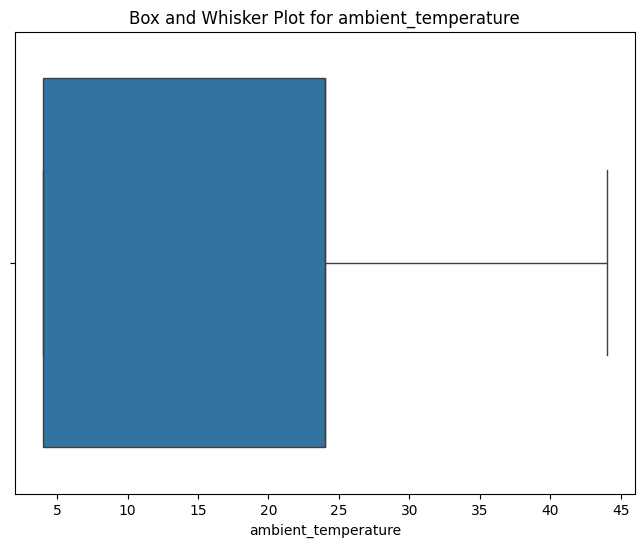

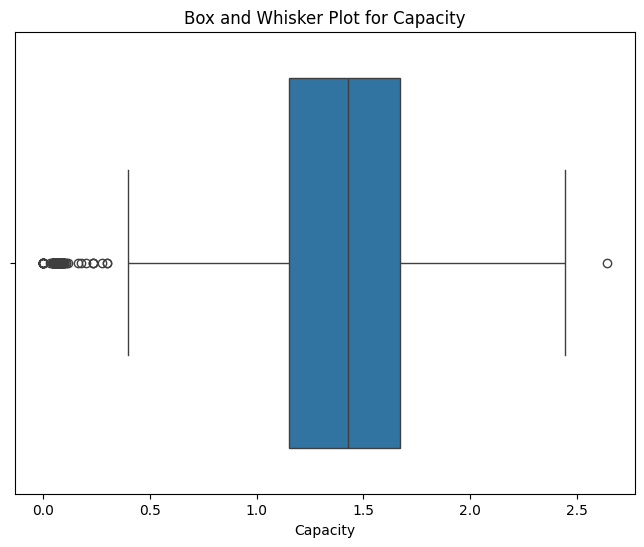

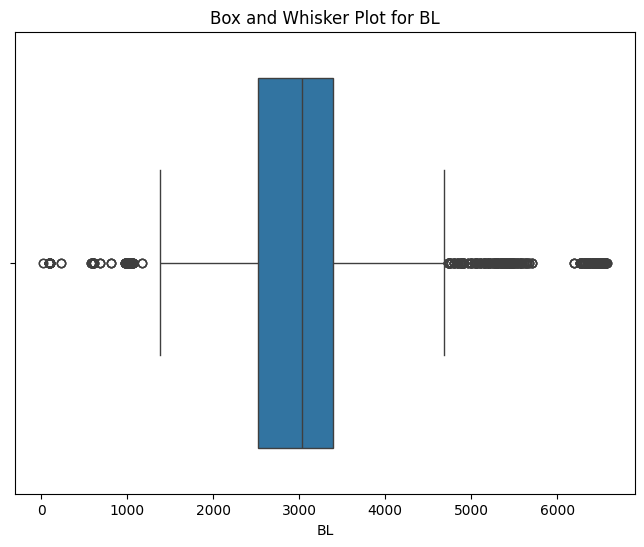

In [22]:
#outlier detection

columns_to_plot = [ 'ambient_temperature', 'Capacity','BL']

# Create box and whisker plots for each selected column using Seaborn
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=discharge_df[column])
    plt.title(f'Box and Whisker Plot for {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
# Capacity has lot of zero which might affect 
# RUl has some outliers analyse why it is like that and what causes to check where it is an incorrect outlier


In [23]:
#create experiment grouping variable for color coding the different experiment

# Define a function to create a new variable based on battery_id
def create_group(battery_id):
    if battery_id in ['B0005','B0006','B0007','B0018'] :
        return 1
    elif battery_id in ['B0025','B0026','B0027','B0028']:
        return 2
    elif battery_id in ['B0029','B0030','B0031','B0032']:
        return 3
    elif battery_id in ['B0033','B0034','B0036']:
        return 4
    elif battery_id in ['B0038','B0039','B0040']:
        return 5
    elif battery_id in ['B0041','B0042','B0043','B0044']:
        return 6
    elif battery_id in ['B0045','B0046','B0047','B0048']:
        return 7
    elif battery_id in ['B0049','B0050','B0051','B0052']:
        return 8
    elif battery_id in ['B0053','B0054','B0055','B0056']:
        return 9
    else:
        return np.nan  # or any other value for undefined cases

# Apply the function to create the new 'group' variable
discharge_df['battery_group'] = discharge_df['battery_id'].apply(create_group)


discharge_df 
 

,type,start_time,ambient_temperature,battery_id,test_id,Capacity,BL,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,...,Current_measured_median,Temperature_measured_median,Current_load_median,Voltage_load_median,Voltage_measured_std,Current_measured_std,Temperature_measured_std,Current_load_std,Voltage_load_std,battery_group
0,discharge,2008-04-02 15:25:41,24,B0005,1,1.856487,3690.234,3.529829,-1.818702,32.572328,...,-2.012427,32.865786,-1.9982,2.6100,0.236558,0.595058,3.495804,0.591217,0.796974,1
1,discharge,2008-04-02 15:25:41,24,B0007,1,1.891052,3690.234,3.522007,-1.869119,32.624859,...,-1.990024,32.747709,-2.0000,2.6030,0.288178,0.476508,3.892063,0.479455,0.659538,1
2,discharge,2008-04-02 15:25:41,24,B0006,1,2.035338,3690.234,3.556946,-1.990533,32.142778,...,-2.010775,32.352429,-1.9992,2.6510,0.226595,0.202011,3.460482,0.200853,0.304399,1
3,discharge,2008-04-02 19:43:48,24,B0005,3,1.846327,3672.344,3.537320,-1.817560,32.725235,...,-2.012368,32.968785,-1.9982,2.6045,0.235366,0.596704,3.435509,0.592561,0.796596,1
4,discharge,2008-04-02 19:43:48,24,B0007,3,1.880637,3672.344,3.531949,-1.868042,32.738210,...,-1.989573,32.865281,-2.0000,2.6105,0.280425,0.477820,3.777426,0.480583,0.659843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,discharge,2010-09-30 11:50:17,4,B0054,250,0.837392,2357.687,3.047978,-1.858151,14.071709,...,-2.011053,12.372063,1.9982,2.1750,0.500644,0.534501,5.401520,0.531157,0.719850,9
2789,discharge,2010-09-30 11:50:17,4,B0055,250,0.990759,2357.687,3.341122,-1.685356,11.412928,...,-1.987498,10.931401,1.9990,2.2180,0.363112,0.715513,3.175032,0.719854,0.850250,9
2791,discharge,2010-09-30 11:50:17,4,B0056,250,1.129059,2357.687,3.349642,-1.722633,10.452748,...,-1.993270,10.439799,1.9982,2.2375,0.291255,0.684880,2.170885,0.686409,0.808908,9
2792,discharge,2010-09-30 15:32:33,4,B0053,136,0.000000,23.000,4.060790,-0.671836,6.164759,...,-0.002086,6.072575,0.0006,2.8060,0.224683,1.160515,0.380250,1.153026,2.141809,9


In [13]:
# it is cleaned for na values and data type correction has  done now 
#you can proceed with tableau viz with this data to analyze.
discharge_df.to_excel('data/cleaned_dataset/experiment_data/discharge_df_v6.xlsx')

